**IMPORT PACKAGES AND DATASET**

In [45]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, root_mean_squared_error, mean_absolute_error, r2_score 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier, DummyRegressor
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import uniform, randint
import warnings
import shap
from xgboost import XGBRegressor, XGBClassifier
from sklearn.decomposition import PCA



c:\Users\marianas\OneDrive - Capgemini\Documents\Projeto R&D\ID Cards\November 2025\ID_8.11.1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
os.chdir("C:/Users/marianas/OneDrive - Capgemini/Documents/Projeto R&D/ID Cards/November 2025/ID_8.11.1")

In [47]:
df = pd.read_csv(".\data\qws1.txt", sep=",", comment='#', engine="python", names=[f"col{i}" for i in range(13)], header=None)

df.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12
0,45.00,83,27.2,50,97.4,89,91,43.00,58,100,1,DictionaryService,http://www.mindswap.org/2002/services/Dictiona...
1,71.75,100,14.6,88,85.5,78,80,64.42,86,93,1,MyService,http://mydispatch.com/myservice.asmx?wsdl
2,117.00,100,23.4,83,88.0,100,87,111.00,59,90,1,aba,http://www.quentinsagerconsulting.com/wsdl/aba...
3,70.00,100,5.4,83,79.3,100,75,63.00,91,90,1,AlexaWebSearch,http://wsearch.amazonaws.com/doc/2007-03-15/We...
4,105.20,100,18.2,80,92.2,78,84,104.60,91,90,1,ErrorMailer,http://www.errormail.net/EM/ErrorMailer.asmx?wsdl


In [48]:
print(df.columns)

Index(['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8',
       'col9', 'col10', 'col11', 'col12'],
      dtype='object')


In [49]:
df.columns=['Response Time', 'Availability', 'Throughput', 'Successability', 'Reliability', 'Compliance', 'Best Practices', 'Latency', 'Documentation', 'WsRF', 'Class', 'Service Name', 'WSDL Address']

In [50]:
df.head()

,Response Time,Availability,Throughput,Successability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF,Class,Service Name,WSDL Address
0,45.00,83,27.2,50,97.4,89,91,43.00,58,100,1,DictionaryService,http://www.mindswap.org/2002/services/Dictiona...
1,71.75,100,14.6,88,85.5,78,80,64.42,86,93,1,MyService,http://mydispatch.com/myservice.asmx?wsdl
2,117.00,100,23.4,83,88.0,100,87,111.00,59,90,1,aba,http://www.quentinsagerconsulting.com/wsdl/aba...
3,70.00,100,5.4,83,79.3,100,75,63.00,91,90,1,AlexaWebSearch,http://wsearch.amazonaws.com/doc/2007-03-15/We...
4,105.20,100,18.2,80,92.2,78,84,104.60,91,90,1,ErrorMailer,http://www.errormail.net/EM/ErrorMailer.asmx?wsdl


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Response Time   364 non-null    float64
 1   Availability    364 non-null    int64  
 2   Throughput      364 non-null    float64
 3   Successability  364 non-null    int64  
 4   Reliability     364 non-null    float64
 5   Compliance      364 non-null    int64  
 6   Best Practices  364 non-null    int64  
 7   Latency         364 non-null    float64
 8   Documentation   364 non-null    int64  
 9   WsRF            364 non-null    int64  
 10  Class           364 non-null    int64  
 11  Service Name    364 non-null    object 
 12  WSDL Address    364 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 37.1+ KB


In [52]:
print(df.isnull().sum())

Response Time     0
Availability      0
Throughput        0
Successability    0
Reliability       0
Compliance        0
Best Practices    0
Latency           0
Documentation     0
WsRF              0
Class             0
Service Name      0
WSDL Address      0
dtype: int64


## EDA

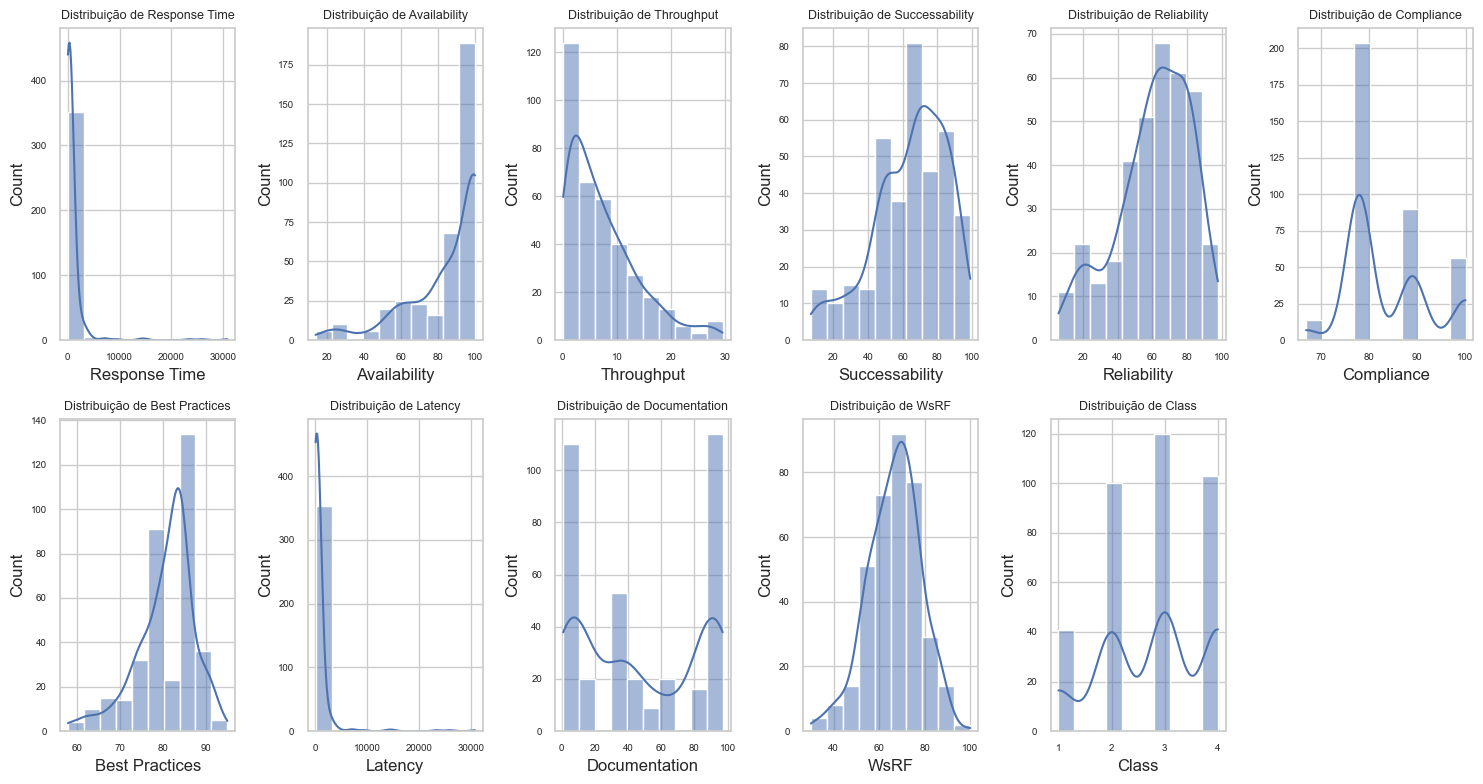

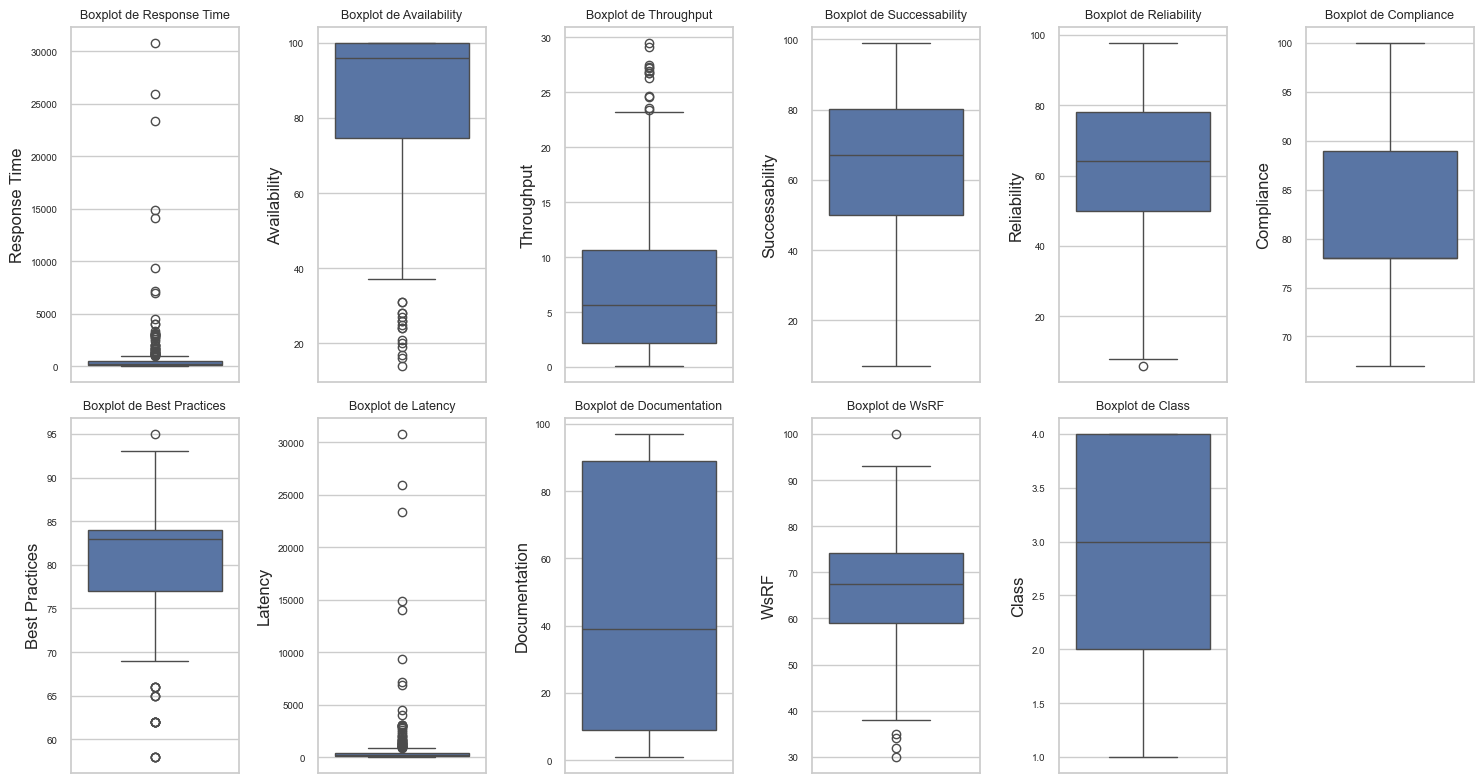

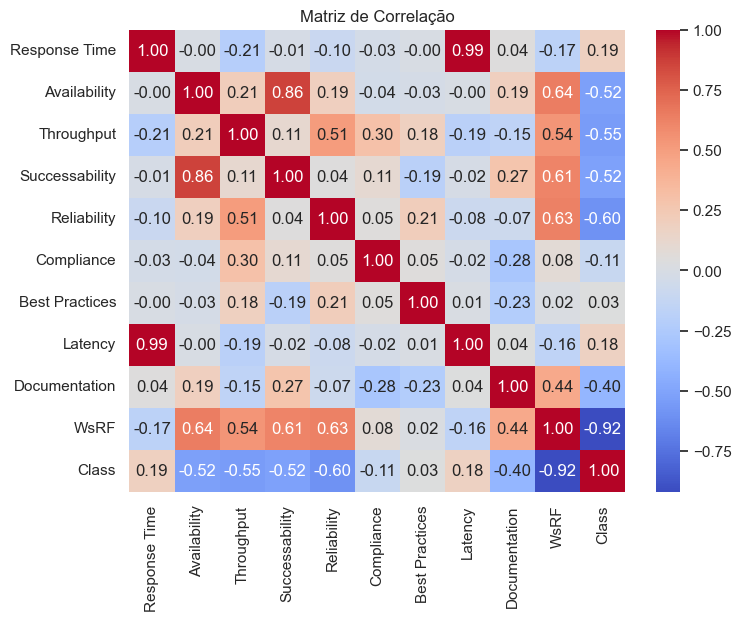

In [53]:
numeric_cols = ['Response Time','Availability','Throughput','Successability','Reliability','Compliance','Best Practices','Latency','Documentation', 'WsRF', 'Class']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

sns.set_theme(style="whitegrid")

# Número de colunas por linha
cols_per_row = math.ceil(len(numeric_cols)/2)

# 1. Histogramas em duas linhas
fig, axes = plt.subplots(nrows=2, ncols=cols_per_row, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribuição de {col}", fontsize=9)
    axes[i].tick_params(axis='x', labelsize=7)
    axes[i].tick_params(axis='y', labelsize=7)
# Ocultar subplots extras
for j in range(len(numeric_cols), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# 2. Boxplots em duas linhas
fig, axes = plt.subplots(nrows=2, ncols=cols_per_row, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}", fontsize=9)
    axes[i].tick_params(axis='y', labelsize=7)
for j in range(len(numeric_cols), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# 3. Matriz de correlação separada
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

Para modelos de classificação (Class como target) deve-se remover WsRF uma vez que tem uma correlação elevada com a variável target (Class)

**Vertificação de Multicolinearidade**

Multicolinearidade: duas ou mais variáveis independentes estão fortemente correlacionadas entre si.

Como detetar multicolinearidade:

1. Correlação alta entre variáveis (ex.: matriz de correlação).

2. VIF (Variance Inflation Factor):
- VIF > 10 → indica multicolinearidade severa.
- VIF entre 5 e 10 → atenção.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Response Time   364 non-null    float64
 1   Availability    364 non-null    int64  
 2   Throughput      364 non-null    float64
 3   Successability  364 non-null    int64  
 4   Reliability     364 non-null    float64
 5   Compliance      364 non-null    int64  
 6   Best Practices  364 non-null    int64  
 7   Latency         364 non-null    float64
 8   Documentation   364 non-null    int64  
 9   WsRF            364 non-null    int64  
 10  Class           364 non-null    int64  
 11  Service Name    364 non-null    object 
 12  WSDL Address    364 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 37.1+ KB


In [55]:
df = df.drop(['Service Name', 'WSDL Address'], axis=1)

df.head()

,Response Time,Availability,Throughput,Successability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF,Class
0,45.00,83,27.2,50,97.4,89,91,43.00,58,100,1
1,71.75,100,14.6,88,85.5,78,80,64.42,86,93,1
2,117.00,100,23.4,83,88.0,100,87,111.00,59,90,1
3,70.00,100,5.4,83,79.3,100,75,63.00,91,90,1
4,105.20,100,18.2,80,92.2,78,84,104.60,91,90,1


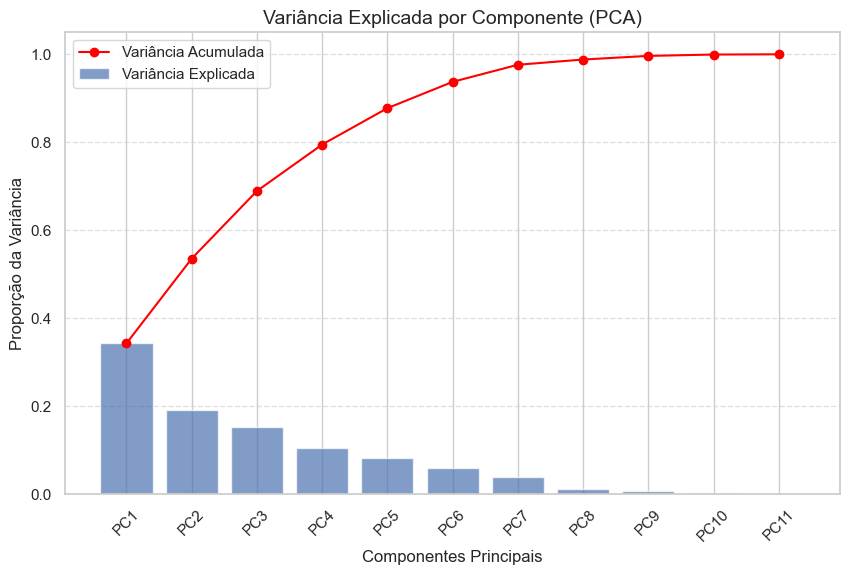

Variância explicada por cada componente:
PC1: 0.3430
PC2: 0.1926
PC3: 0.1537
PC4: 0.1056
PC5: 0.0827
PC6: 0.0598
PC7: 0.0389
PC8: 0.0119
PC9: 0.0083
PC10: 0.0031
PC11: 0.0005

Variância acumulada:
Até PC1: 0.3430
Até PC2: 0.5356
Até PC3: 0.6894
Até PC4: 0.7949
Até PC5: 0.8776
Até PC6: 0.9374
Até PC7: 0.9763
Até PC8: 0.9882
Até PC9: 0.9964
Até PC10: 0.9995
Até PC11: 1.0000


In [56]:
# Normalizar os dados antes do PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Aplicar PCA
pca = PCA()
pca.fit(scaled_data)

# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_
components = [f"PC{i+1}" for i in range(len(explained_variance))]

# Variância acumulada
cumulative_variance = np.cumsum(explained_variance)

# Criar gráfico com Matplotlib
plt.figure(figsize=(10, 6))

# Gráfico de barras para variância explicada
plt.bar(components, explained_variance, alpha=0.7, label='Variância Explicada')

# Linha para variância acumulada
plt.plot(components, cumulative_variance, marker='o', color='red', label='Variância Acumulada')

# Adicionar títulos e legendas
plt.title('Variância Explicada por Componente (PCA)', fontsize=14)
plt.xlabel('Componentes Principais', fontsize=12)
plt.ylabel('Proporção da Variância', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Mostrar valores no console
print("Variância explicada por cada componente:")
for comp, var in zip(components, explained_variance):
    print(f"{comp}: {var:.4f}")

print("\nVariância acumulada:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"Até {components[i]}: {cum_var:.4f}")

Matriz de Loadings:
                     PC1       PC2       PC3       PC4       PC5       PC6  \
Response Time  -0.148581  0.532716  0.423917 -0.038571 -0.077817 -0.025430   
Availability    0.369117  0.264418 -0.070689  0.273119  0.434126 -0.182604   
Throughput      0.308625 -0.268616  0.333294  0.027282 -0.164565 -0.097408   
Successability  0.350458  0.298829 -0.167868  0.417726  0.234057 -0.024460   
Reliability     0.310614 -0.169242  0.354243 -0.346400 -0.079335 -0.339366   
Compliance      0.065270 -0.169794  0.293947  0.630333 -0.387964  0.462185   
Best Practices  0.000591 -0.203814  0.384593 -0.193593  0.679617  0.547375   
Latency        -0.143492  0.526112  0.437404 -0.040635 -0.079445 -0.024140   
Documentation   0.171730  0.323031 -0.348978 -0.393110 -0.239990  0.560572   
WsRF            0.497425  0.063827  0.037316 -0.129721 -0.065827  0.083296   
Class          -0.474712 -0.024786 -0.041567  0.144478  0.191532 -0.075869   

                     PC7       PC8       PC

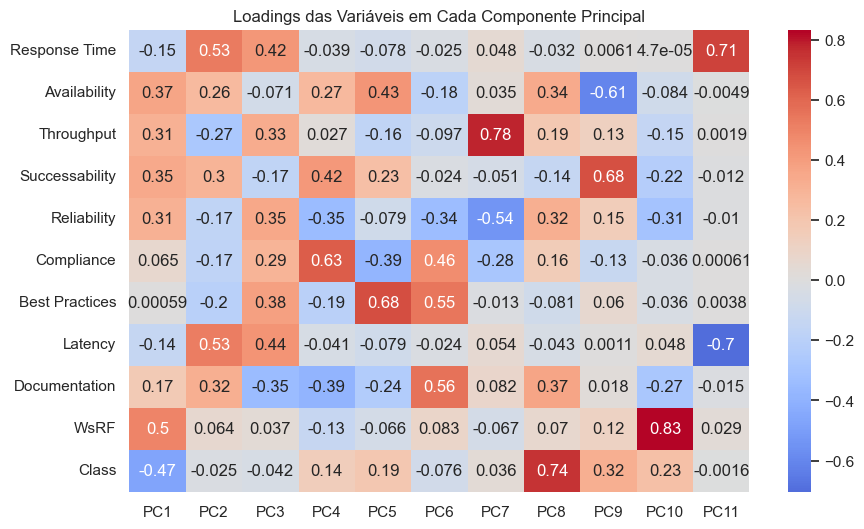

In [57]:
# Obter loadings (componentes principais)
loadings = pca.components_

# Criar DataFrame com loadings
loading_matrix = pd.DataFrame(loadings.T,  # Transpor para ter variáveis nas linhas
                              index=df.columns,
                              columns=[f'PC{i+1}' for i in range(len(df.columns))])

print("Matriz de Loadings:")
print(loading_matrix)

# Visualizar com heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Loadings das Variáveis em Cada Componente Principal')
plt.show()

- Cada célula indica o peso da variável em um componente.
- Valores altos (positivos ou negativos) significam que a variável contribui fortemente para aquele componente.

**Exemplo:**
- Se Response Time tem peso alto em PC1, isso indica que PC1 está fortemente associado a essa variável.
- Se várias variáveis têm pesos altos no mesmo componente, elas estão correlacionadas.

- PC1: WsRF (0.497), Class (-0.474), Availability (0.369), Successability (0.350), Reliability (0.310) → PC1 parece capturar características relacionadas à estrutura do serviço e confiabilidade.
- PC2: Response Time (0.533), Latency (0.526), Documentation (0.323) → PC2 está fortemente associado a desempenho e documentação.
- PC3: Response Time (0.424), Latency (0.437), Best Practices (0.385), Reliability (0.354) → Mistura de tempo e boas práticas.
- PC4: Compliance (0.630), Successability (0.418), Documentation (-0.393) → PC4 foca em conformidade e sucesso.

In [58]:
X = add_constant(df)

vif_data = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print(vif_data)

           feature         VIF
0            const  712.250248
1    Response Time   88.128673
2     Availability    5.548951
3       Throughput    2.693354
4   Successability    7.010405
5      Reliability    4.889658
6       Compliance    1.475708
7   Best Practices    1.233048
8          Latency   86.949748
9    Documentation    4.119337
10            WsRF   21.008432
11           Class    7.024310


In [59]:
# faz-se drop desta variável porque tem um VIF muito alto

df = df.drop('Latency', axis = 1)

df.head()

,Response Time,Availability,Throughput,Successability,Reliability,Compliance,Best Practices,Documentation,WsRF,Class
0,45.00,83,27.2,50,97.4,89,91,58,100,1
1,71.75,100,14.6,88,85.5,78,80,86,93,1
2,117.00,100,23.4,83,88.0,100,87,59,90,1
3,70.00,100,5.4,83,79.3,100,75,91,90,1
4,105.20,100,18.2,80,92.2,78,84,91,90,1


# Split and Scale

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Response Time   364 non-null    float64
 1   Availability    364 non-null    int64  
 2   Throughput      364 non-null    float64
 3   Successability  364 non-null    int64  
 4   Reliability     364 non-null    float64
 5   Compliance      364 non-null    int64  
 6   Best Practices  364 non-null    int64  
 7   Documentation   364 non-null    int64  
 8   WsRF            364 non-null    int64  
 9   Class           364 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 28.6 KB


In [61]:
X = df.drop(['Class', 'WsRF'], axis = 1)
Y = df[['Class', 'WsRF']]

x_train, x_test, y_train, y_test = train_test_split(
    X, Y,
    test_size= 0.3,
    random_state=42
)

In [62]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Baseline Model for Classification

In [63]:
baseline_clf = DummyClassifier(strategy="stratified", random_state = 42)
baseline_clf.fit(x_train_scaled, y_train['Class'])
y_pred = baseline_clf.predict(x_test_scaled)
y_score = baseline_clf.predict_proba(x_test_scaled)

print(f"Baseline Accuracy Score: {accuracy_score(y_test['Class'], y_pred):.2f}")
print(f"Baseline F1-Score: {f1_score(y_test['Class'], y_pred, average='micro'):.2f}")
print(f"Baseline ROC-AUC Score: {roc_auc_score(y_test['Class'], y_score, multi_class='ovr', average='macro'):.2f}")


Baseline Accuracy Score: 0.26
Baseline F1-Score: 0.26
Baseline ROC-AUC Score: 0.50


## Random Forest model

In [64]:
rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(x_train_scaled, y_train['Class'])

y_pred_rf = rf_clf.predict(x_test_scaled)

y_score_rf = rf_clf.predict_proba(x_test_scaled) # probabilidades para cada classe

# avaliação do modelo
print(f"Accuracy Score: {accuracy_score(y_test['Class'], y_pred_rf):.2f}") #percentagem de acertos
print(f"F1-Score: {f1_score(y_test['Class'], y_pred_rf, average='micro'):.2f}")# média ponderada considerando todas as classes
print(f"ROC-AUC Score: {roc_auc_score(y_test['Class'], y_score_rf, multi_class='ovr', average='macro'):.2f}") # avalia separação entre classes usando probabilidades

Accuracy Score: 0.80
F1-Score: 0.80
ROC-AUC Score: 0.96


**Accuracy**
Mede a percentagem de previsões corretas.
Fórmula:
- Accuracy = nº de acertos / total de exemplos
- Bom para classes balanceadas, mas pode ser enganador se uma classe domina (ex.: 90% de uma classe → modelo acerta sempre essa classe → accuracy alto, mas modelo ruim).

**F1-Score** Combina precisão (precision) e recall numa única métrica:
- F1 = 2 x [(Precision x Recall) / (Precision+Recall)]
- Micro → calcula métricas globais considerando todas as classes juntas (bom para classes balanceadas).
- Macro → calcula F1 por classe e faz média (bom para classes desbalanceadas).

**ROC-AUC (macro)** Mede a capacidade do modelo em distinguir classes usando probabilidades.
- AUC = 1.0 → separação perfeita; AUC = 0.5 → modelo aleatório.
- Macro → média das AUCs de todas as classes.
- Bom para avaliar discriminação, mesmo com classes desbalanceadas.

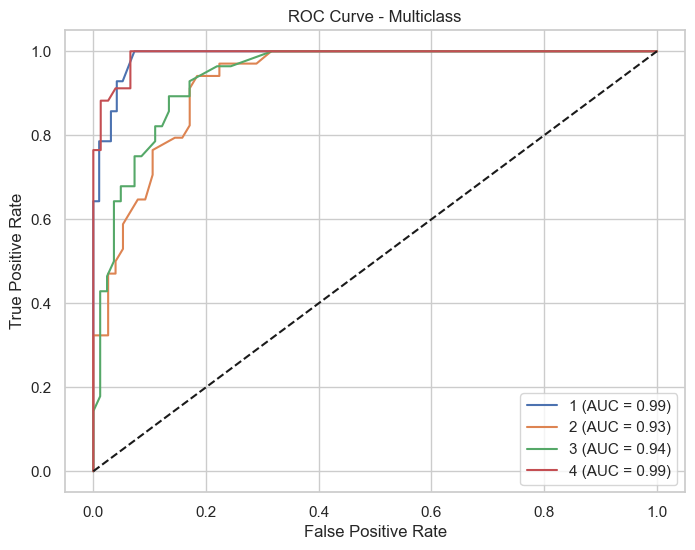

In [65]:
y_true_bin = label_binarize(y_test['Class'], classes=[1, 2, 3, 4])
n_classes = y_true_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{i+1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

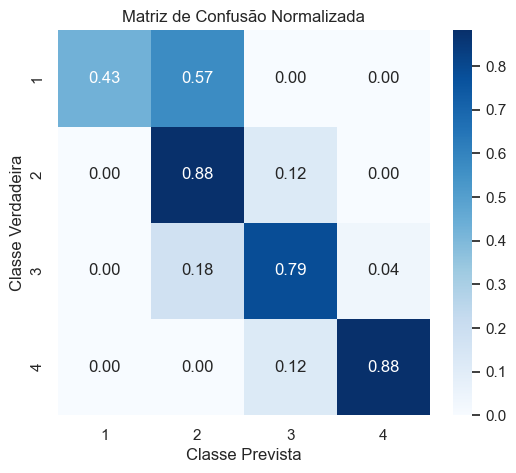

In [66]:
cm = confusion_matrix(y_test['Class'], y_pred_rf)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão Normalizada')
plt.show()

In [67]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500], #número de trees
    'max_depth': [None, 10, 20, 30, 40], #profundidade máxima das trees
    'min_samples_split': [2, 5, 10], #mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4], #mínimo de amostras em uma folha
    'max_features': ['sqrt', 'log2'] #número de features a considerar em cada split
}

rf_model = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy', 
    cv=5,      
    verbose=2,
    random_state=42,
    n_jobs=-1,
    error_score='raise'  
        
)

rf_search.fit(x_train_scaled, y_train['Class'])

print("Best Parameters:", rf_search.best_params_)
print("Best Score:", rf_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40}
Best Score: 0.747921568627451


## Random Forest com parâmetros escolhidos

In [68]:
rf_tuned = RandomForestClassifier(n_estimators = 500, min_samples_split = 5, min_samples_leaf = 1, 
                                  max_features = 'sqrt', max_depth = None, random_state = 42)

rf_tuned.fit(x_train_scaled, y_train['Class'])

y_pred_tuned_rf = rf_tuned.predict(x_test_scaled)
y_score_tuned_rf = rf_tuned.predict_proba(x_test_scaled)

print(f"Accuracy Score: {accuracy_score(y_test['Class'], y_pred_tuned_rf):.2f}")
print(f"F1-Score: {f1_score(y_test['Class'], y_pred_tuned_rf, average='micro'):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test['Class'], y_score_tuned_rf, multi_class='ovr', average='macro'):.2f}")

Accuracy Score: 0.80
F1-Score: 0.80
ROC-AUC Score: 0.96


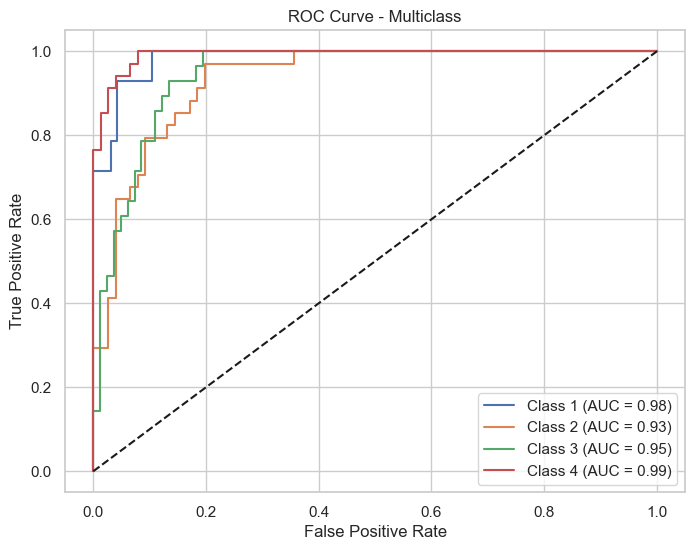

In [69]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score_tuned_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

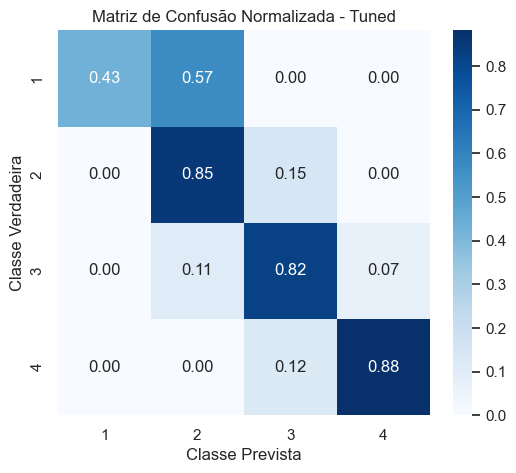

In [70]:
# Matriz de confusão com previsões do modelo manual
cm = confusion_matrix(y_test['Class'], y_pred_tuned_rf)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão Normalizada - Tuned')
plt.show()

## XGBooost Classifier model

In [71]:
xgb_clf = XGBClassifier(random_state = 42)

xgb_clf.fit(x_train_scaled, y_train['Class'] - 1)

y_pred_xgb_clf = xgb_clf.predict(x_test_scaled)
y_score_xgb_clf = xgb_clf.predict_proba(x_test_scaled)

print(f"Accuracy Score: {accuracy_score(y_test['Class'] - 1, y_pred_xgb_clf):.2f}")
print(f"F1-Score: {f1_score(y_test['Class'] - 1, y_pred_xgb_clf, average='micro'):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test['Class'] - 1, y_score_xgb_clf, multi_class='ovr', average='macro'):.2f}")

Accuracy Score: 0.77
F1-Score: 0.77
ROC-AUC Score: 0.94


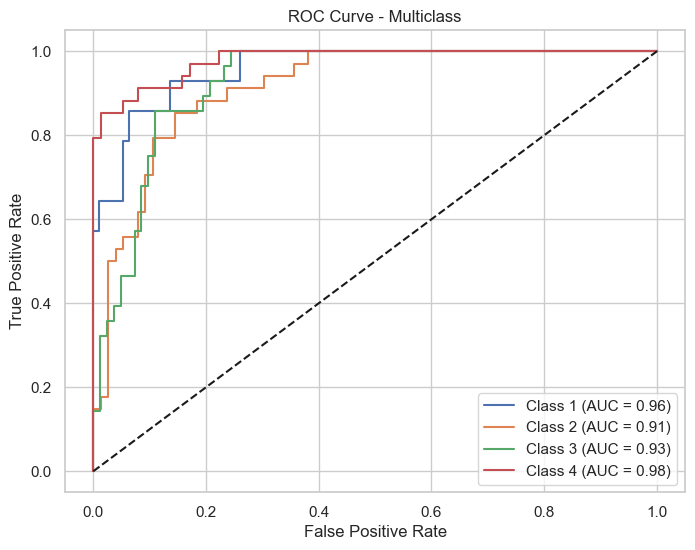

In [72]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score_xgb_clf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

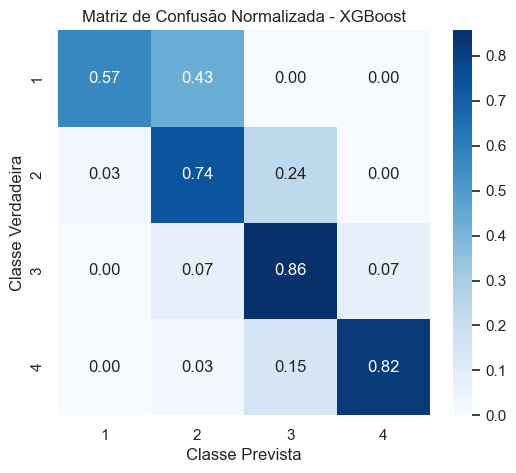

In [73]:
cm = confusion_matrix(y_test['Class'] - 1, y_pred_xgb_clf)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão Normalizada - XGBoost')
plt.show()

In [74]:
xgb_clf_model = XGBClassifier(random_state = 42)

param_dist = {
    'n_estimators': randint(100, 1000),       
    'max_depth': randint(3, 10),             
    'learning_rate': uniform(0.01, 0.3),     
    'subsample': uniform(0.6, 0.4),          
    'colsample_bytree': uniform(0.6, 0.4),   
    'gamma': uniform(0, 5),                  
    'reg_alpha': uniform(0, 1),              
    'reg_lambda': uniform(0, 1)              
}

xgb_clf_search = RandomizedSearchCV(
    estimator=xgb_clf_model,
    param_distributions=param_dist,
    n_iter=30,             
    scoring='accuracy',    
    cv=5,                  
    random_state=42,
    n_jobs=-1              
)

xgb_clf_search.fit(x_train_scaled, y_train['Class'] - 1)

print("Best Parameters:", xgb_clf_search.best_params_)

best_model = xgb_clf_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test['Class'] - 1, y_pred))


Best Parameters: {'colsample_bytree': np.float64(0.7541666010159664), 'gamma': np.float64(0.07983126110107097), 'learning_rate': np.float64(0.0792681476866447), 'max_depth': 6, 'n_estimators': 466, 'reg_alpha': np.float64(0.6832635188254582), 'reg_lambda': np.float64(0.6099966577826209), 'subsample': np.float64(0.9332779646944658)}
Accuracy: 0.8090909090909091


## XGBoost com hiperparametrização

In [75]:
xgb_clf_tuned = XGBClassifier(
    colsample_bytree = 0.75,
    gamma = 0.08,
    learning_rate = 0.08,
    max_depth = 6,
    n_estimators = 466,
    reg_alpha = 0.68,
    reg_lambda = 0.61,
    subsample = 0.93,
    random_state = 42
    )

xgb_clf_tuned.fit(x_train_scaled, y_train['Class'] - 1)

y_pred_xgb_clf_tuned = xgb_clf_tuned.predict(x_test_scaled)
y_score_xgb_clf_tuned = xgb_clf_tuned.predict_proba(x_test_scaled)

print(f"Accuracy Score: {accuracy_score(y_test['Class'] - 1, y_pred_xgb_clf_tuned):.2f}")
print(f"F1-Score: {f1_score(y_test['Class'] - 1, y_pred_xgb_clf_tuned, average='micro'):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test['Class'] - 1, y_score_xgb_clf_tuned, multi_class='ovr', average='macro'):.2f}")

Accuracy Score: 0.79
F1-Score: 0.79
ROC-AUC Score: 0.95


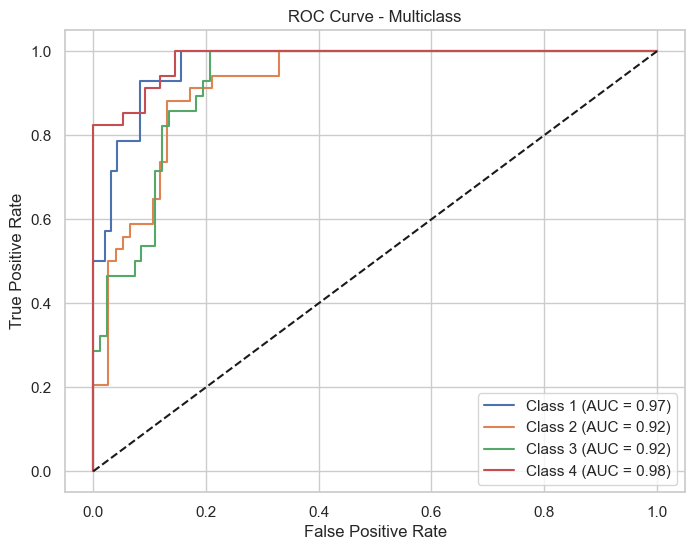

In [76]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score_xgb_clf_tuned[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

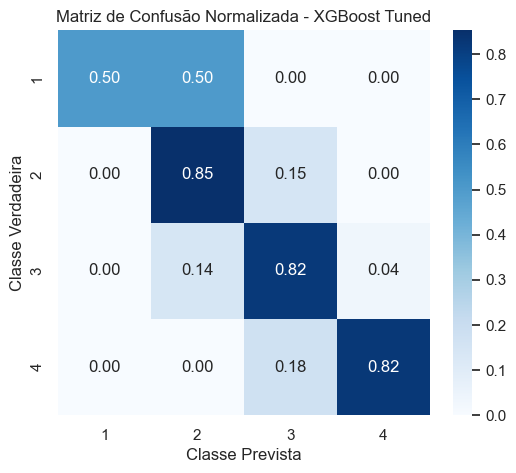

In [77]:
cm = confusion_matrix(y_test['Class'] - 1, y_pred_xgb_clf_tuned)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão Normalizada - XGBoost Tuned')
plt.show()

## Baseline Regression Model

In [78]:
baseline_reg = DummyRegressor(strategy="mean")
baseline_reg.fit(x_train_scaled, y_train)
y_pred = baseline_reg.predict(x_test_scaled)

print(f"Baseline RMSE: {root_mean_squared_error(y_test, y_pred):.2f}")
print(f"Baseline MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Baseline R2: {r2_score(y_test, y_pred):.2f}")

Baseline RMSE: 7.07
Baseline MAE: 5.70
Baseline R2: -0.00


## Logistic Regression Model

In [79]:
lg_model = LogisticRegression(random_state=42)

lg_model.fit(x_train_scaled, y_train['WsRF'])

y_pred_lg = lg_model.predict(x_test_scaled)

print(f"Baseline RMSE: {root_mean_squared_error(y_test['WsRF'], y_pred_lg):.2f}")
print(f"Baseline MAE: {mean_absolute_error(y_test['WsRF'], y_pred_lg):.2f}")
print(f"Baseline R2: {r2_score(y_test['WsRF'], y_pred_lg):.2f}")

Baseline RMSE: 6.84
Baseline MAE: 5.25
Baseline R2: 0.73


In [80]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

param_dist = {
    'C': uniform(0.01, 10),           
    'penalty': ['l1', 'l2'],          
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=20,                        
    scoring='accuracy',               
    cv=5,                             
    random_state=42,
    n_jobs=-1                         
)

random_search.fit(x_train_scaled, y_train['WsRF'])

print("Best Parameters:", random_search.best_params_)

c:\Users\marianas\OneDrive - Capgemini\Documents\Projeto R&D\ID Cards\November 2025\ID_8.11.1\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': np.float64(3.0561376917337064), 'class_weight': None, 'penalty': 'l2'}


c:\Users\marianas\OneDrive - Capgemini\Documents\Projeto R&D\ID Cards\November 2025\ID_8.11.1\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


In [81]:
lg_model_tuned = LogisticRegression(C = 3.05, class_weight = None, penalty = 'l2', random_state=42)

lg_model_tuned.fit(x_train_scaled, y_train['WsRF'])

y_pred_lg_tuned = lg_model_tuned.predict(x_test_scaled)

print(f"Baseline RMSE: {root_mean_squared_error(y_test['WsRF'], y_pred_lg_tuned):.2f}")
print(f"Baseline MAE: {mean_absolute_error(y_test['WsRF'], y_pred_lg_tuned):.2f}")
print(f"Baseline R2: {r2_score(y_test['WsRF'], y_pred_lg_tuned):.2f}")

Baseline RMSE: 6.44
Baseline MAE: 4.76
Baseline R2: 0.76


## XGBoost Regression Model

In [82]:
xgb_reg = XGBRegressor(random_state = 42)

xgb_reg.fit(x_train_scaled, y_train['WsRF'])

y_pred_xgb_reg = xgb_reg.predict(x_test_scaled)

print(f"RMSE: {root_mean_squared_error(y_test['WsRF'], y_pred_xgb_reg):.2f}")
print(f"MAE: {mean_absolute_error(y_test['WsRF'], y_pred_xgb_reg):.2f}")
print(f"R2: {r2_score(y_test['WsRF'], y_pred_xgb_reg):.2f}")

RMSE: 3.59
MAE: 2.51
R2: 0.92


In [83]:
xgb_reg_model = XGBRegressor(random_state = 42)

param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 2, 5, 8],
    'learning_rate': [0.01, 0.05, 0.08, 0.1],
    'subsample': [0.2, 0.4, 0.6, 0.8]
}

xgb_reg_search = RandomizedSearchCV(
    estimator=xgb_reg_model,
    param_distributions=param_dist,
    n_iter=20,                        
    scoring='accuracy',               
    cv=5,                             
    random_state=42,
    n_jobs=-1                         
)

xgb_reg_search.fit(x_train_scaled, y_train['WsRF'])

print("Best Parameters:", xgb_reg_search.best_params_)

Best Parameters: {'subsample': 0.2, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}


c:\Users\marianas\OneDrive - Capgemini\Documents\Projeto R&D\ID Cards\November 2025\ID_8.11.1\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


In [84]:
xgb_reg_tuned = XGBRegressor(
    n_estimators = 100,
    max_depth = 5,
    learning_rate = 0.1,
    subsample = 0.2,
    random_state = 42)

xgb_reg_tuned.fit(x_train_scaled, y_train['WsRF'])

y_pred_xgb_reg_tuned = xgb_reg_tuned.predict(x_test_scaled)

print(f"RMSE: {root_mean_squared_error(y_test['WsRF'], y_pred_xgb_reg_tuned):.2f}")
print(f"MAE: {mean_absolute_error(y_test['WsRF'], y_pred_xgb_reg_tuned):.2f}")
print(f"R2: {r2_score(y_test['WsRF'], y_pred_xgb_reg_tuned):.2f}")

RMSE: 2.97
MAE: 2.02
R2: 0.95


## Tuning com RandomizedSearchCV

In [85]:
rf_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None] + list(range(5, 30, 5)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

rf_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(x_train_scaled, y_train['Class'])
print("RF Best Params:", rf_search.best_params_)
print("RF Best Score:", rf_search.best_score_)


# 2. Logistic Regression (Classificação)

log_param_dist = {
    'C': uniform(0.01, 10),
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}

log_search = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
    param_distributions=log_param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

log_search.fit(x_train_scaled, y_train['WsRF'])
print("Logistic Best Params:", log_search.best_params_)
print("Logistic Best Score:", log_search.best_score_)


# 3. XGBoost Classifier (Classificação)

xgb_clf_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

xgb_clf_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_distributions=xgb_clf_param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

xgb_clf_search.fit(x_train_scaled, y_train['Class'] - 1)
print("XGBClassifier Best Params:", xgb_clf_search.best_params_)
print("XGBClassifier Best Score:", xgb_clf_search.best_score_)


# 4. XGBRegressor (Regressão)

xgb_reg_param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(2, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

xgb_reg_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=xgb_reg_param_dist,
    n_iter=30,
    scoring='neg_mean_squared_error',  # para regressão
    cv=5,
    random_state=42,
    n_jobs=-1
)

xgb_reg_search.fit(x_train_scaled, y_train['WsRF'])
print("XGBRegressor Best Params:", xgb_reg_search.best_params_)
print("XGBRegressor Best Score:", xgb_reg_search.best_score_)

RF Best Params: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 661}
RF Best Score: 0.747921568627451


c:\Users\marianas\OneDrive - Capgemini\Documents\Projeto R&D\ID Cards\November 2025\ID_8.11.1\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\marianas\OneDrive - Capgemini\Documents\Projeto R&D\ID Cards\November 2025\ID_8.11.1\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


Logistic Best Params: {'C': np.float64(3.0561376917337064), 'class_weight': None, 'penalty': 'l2'}
Logistic Best Score: 0.13011764705882353
XGBClassifier Best Params: {'colsample_bytree': np.float64(0.7541666010159664), 'gamma': np.float64(0.07983126110107097), 'learning_rate': np.float64(0.0792681476866447), 'max_depth': 6, 'n_estimators': 466, 'reg_alpha': np.float64(0.6832635188254582), 'reg_lambda': np.float64(0.6099966577826209), 'subsample': np.float64(0.9332779646944658)}
XGBClassifier Best Score: 0.7598431372549019
XGBRegressor Best Params: {'colsample_bytree': np.float64(0.8370786895517575), 'gamma': np.float64(0.40426663166357624), 'learning_rate': np.float64(0.12089633681842132), 'max_depth': 2, 'n_estimators': 304, 'reg_alpha': np.float64(0.8031397563798959), 'reg_lambda': np.float64(0.4703006344460384), 'subsample': np.float64(0.9933692563579372)}
XGBRegressor Best Score: -5.503939199447632


For XGBRegressor:
- best_score_ = -5.50 → MSE = 5.50

## SHAP Evaluation

**XGBRegressor**

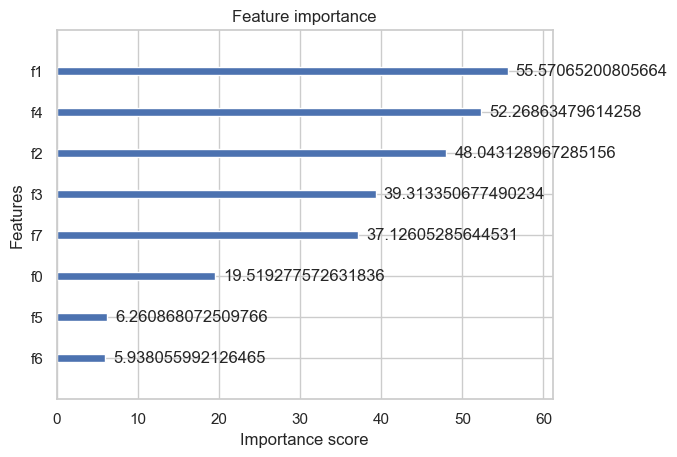

In [86]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plot_importance(xgb_reg_tuned, importance_type='gain')  # 'gain' is most common
plt.show()

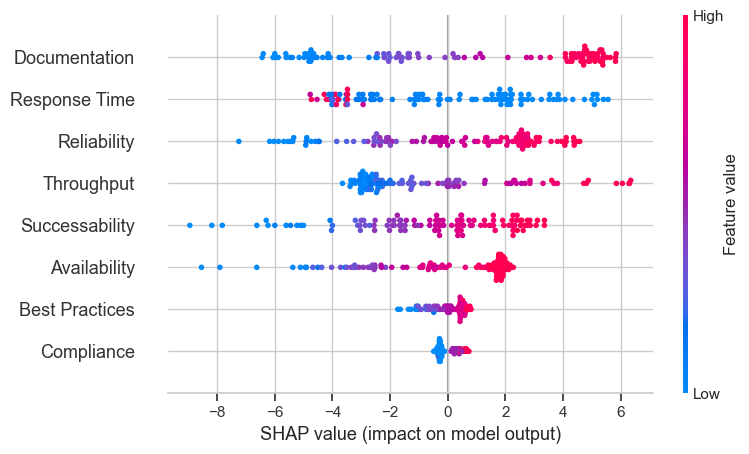

In [87]:
# Assuming you have original feature names from x_train
feature_names = x_train.columns  # original DataFrame before scaling

# Convert scaled arrays to DataFrames
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=feature_names)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=feature_names)

# Use these for SHAP
explainer = shap.Explainer(xgb_reg_tuned, x_train_scaled_df)
shap_values = explainer(x_test_scaled_df)

# Summary plot
shap.summary_plot(shap_values, x_test_scaled_df, feature_names=feature_names)

# Individual prediction explanation


## Model Evaluation

In [ ]:
xgb_clf = XGBClassifier(random_state = 42)

xgb_clf.fit(x_train_scaled, y_train['Class'] - 1)

y_pred_xgb_clf = xgb_clf.predict(x_test_scaled)
y_score_xgb_clf = xgb_clf.predict_proba(x_test_scaled)

print(f"Accuracy Score: {accuracy_score(y_test['Class'] - 1, y_pred_xgb_clf):.2f}")
print(f"F1-Score: {f1_score(y_test['Class'] - 1, y_pred_xgb_clf, average='micro'):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test['Class'] - 1, y_score_xgb_clf, multi_class='ovr', average='macro'):.2f}")

In [ ]:
# Funções auxiliares

def root_mean_squared_error(y_true, y_pred):
    return sqrt(((y_true - y_pred) ** 2).mean())

# Calcular métricas para cada modelo

summary_data = []

# CLASSIFICAÇÃO
# Baseline
baseline_clf.fit(x_train_scaled, y_train['Class'])
y_pred = baseline_clf.predict(x_test_scaled)
y_score = baseline_clf.predict_proba(x_test_scaled)

summary_data.append({
    "Model": "Baseline (DummyClassifier)",
    "Type": "Classification",
    "Accuracy": accuracy_score(y_test['Class'], y_pred),
    "F1": f1_score(y_test['Class'], y_pred, average='micro'),
    "ROC-AUC": roc_auc_score(y_test['Class'], y_score, multi_class='ovr', average='macro'),
    "Best Params": None,
    "CV Score": None
})

# RandomForest
rf_clf.fit(x_train_scaled, y_train['Class'])
y_pred_rf = rf_clf.predict(x_test_scaled)
y_score_rf = rf_clf.predict_proba(x_test_scaled)

summary_data.append({
    "Model": "RandomForest",
    "Type": "Classification",
    "Accuracy": accuracy_score(y_test['Class'], y_pred_rf),
    "F1": f1_score(y_test['Class'], y_pred_rf, average='micro'),
    "ROC-AUC": roc_auc_score(y_test['Class'], y_score_rf, multi_class='ovr', average='macro'),
    "Best Params": rf_search.best_params_,
    "CV Score": rf_search.best_score_
})

#editar aqui para fazer avaliação dos seguintes modelos
# XGBClassifier (ajuste para rótulos começando em 1)
xgb_clf.fit(x_train_scaled, y_train['Class'] - 1)
y_pred_xgb_clf = xgb_clf.predict(x_test_scaled)
y_score_xgb_clf = xgb_clf.predict_proba(x_test_scaled)
summary_data.append({
    "Model": "XGBClassifier (Tuned)",
    "Type": "Classification",
    "Accuracy": accuracy_score(y_pred_xgb_clf, y_pred_xgb_clf_tuned),
    "F1": f1_score(y_pred_xgb_clf, y_pred_xgb_clf_tuned, average='micro'),
    "ROC-AUC": roc_auc_score(y_pred_xgb_clf, xgb_clf_tuned.predict_proba(X_test), multi_class='ovr', average='macro'),
    "Best Params": xgb_clf_search.best_params_,
    "CV Score": xgb_clf_search.best_score_
})
'''
# REGRESSÃO
# Baseline
summary_data.append({
    "Model": "Baseline (DummyRegressor)",
    "Type": "Regression",
    "RMSE": root_mean_squared_error(y_test['WsRF'], y_pred_dummy_reg),
    "MAE": mean_absolute_error(y_test['WsRF'], y_pred_dummy_reg),
    "R2": r2_score(y_test['WsRF'], y_pred_dummy_reg),
    "Best Params": None,
    "CV Score": None
})

# Logistic Regression
summary_data.append({
    "Model": "Logistic Regression (Tuned)",
    "Type": "Regression",
    "RMSE": root_mean_squared_error(y_test['WsRF'], y_pred_lg_tuned),
    "MAE": mean_absolute_error(y_test['WsRF'], y_pred_lg_tuned),
    "R2": r2_score(y_test['WsRF'], y_pred_lg_tuned),
    "Best Params": random_search.best_params_,
    "CV Score": random_search.best_score_
})

# XGBRegressor
summary_data.append({
    "Model": "XGBRegressor (Tuned)",
    "Type": "Regression",
    "RMSE": root_mean_squared_error(y_test['WsRF'], y_pred_xgb_reg_tuned),
    "MAE": mean_absolute_error(y_test['WsRF'], y_pred_xgb_reg_tuned),
    "R2": r2_score(y_test['WsRF'], y_pred_xgb_reg_tuned),
    "Best Params": xgb_reg_search.best_params_,
    "CV Score": xgb_reg_search.best_score_
})


# Criar DataFrame

df_summary = pd.DataFrame(summary_data)
print(df_summary)


# Gráficos comparativos

classification_df = df_summary[df_summary['Type'] == 'Classification']
fig_class = px.bar(classification_df, x='Model', y=['Accuracy', 'F1', 'ROC-AUC'],
                   barmode='group', title='Desempenho dos Modelos de Classificação')
fig_class.write_image('classification_metrics.png')

regression_df = df_summary[df_summary['Type'] == 'Regression']
fig_reg = px.bar(regression_df, x='Model', y=['RMSE', 'MAE', 'R2'],
                 barmode='group', title='Desempenho dos Modelos de Regressão')
fig_reg.write_image('regression_metrics.png')

print(f"✅ Arquivo Excel salvo em: {excel_file}")
print("✅ Gráficos salvos: classification_metrics.png, regression_metrics.png")'''

'\n# XGBClassifier (ajuste para rótulos começando em 1)\ny_true_xgb = y_test[\'Class\'] - 1 if y_test[\'Class\'].min() == 1 else y_test[\'Class\']\nsummary_data.append({\n    "Model": "XGBClassifier (Tuned)",\n    "Type": "Classification",\n    "Accuracy": accuracy_score(y_true_xgb, y_pred_xgb_clf_tuned),\n    "F1": f1_score(y_true_xgb, y_pred_xgb_clf_tuned, average=\'micro\'),\n    "ROC-AUC": roc_auc_score(y_true_xgb, xgb_clf_tuned.predict_proba(X_test), multi_class=\'ovr\', average=\'macro\'),\n    "Best Params": xgb_clf_search.best_params_,\n    "CV Score": xgb_clf_search.best_score_\n})\n\n# REGRESSÃO\n# Baseline\nsummary_data.append({\n    "Model": "Baseline (DummyRegressor)",\n    "Type": "Regression",\n    "RMSE": root_mean_squared_error(y_test[\'WsRF\'], y_pred_dummy_reg),\n    "MAE": mean_absolute_error(y_test[\'WsRF\'], y_pred_dummy_reg),\n    "R2": r2_score(y_test[\'WsRF\'], y_pred_dummy_reg),\n    "Best Params": None,\n    "CV Score": None\n})\n\n# Logistic Regression\nsumm

In [47]:
summary_data = [
    # CLASSIFICAÇÃO
    {
        "Model": "Baseline (DummyClassifier)",
        "Type": "Classification",
        "Accuracy": accuracy_score(y_test['Class'], y_pred),  # baseline_clf
        "F1": f1_score(y_test['Class'], y_pred, average='micro'),
        "ROC-AUC": roc_auc_score(y_test['Class'], y_score, multi_class='ovr', average='macro'),
        "Best Params": None,
        "CV Score": None
    },
    {
        "Model": "RandomForest (Tuned)",
        "Type": "Classification",
        "Accuracy": accuracy_score(y_test['Class'], y_pred_tuned_rf),
        "F1": f1_score(y_test['Class'], y_pred_tuned_rf, average='micro'),
        "ROC-AUC": roc_auc_score(y_test['Class'], y_score_tuned_rf, multi_class='ovr', average='macro'),
        "Best Params": rf_search.best_params_,
        "CV Score": rf_search.best_score_
    },
    {
        "Model": "XGBClassifier (Tuned)",
        "Type": "Classification",
        "Accuracy": accuracy_score(y_test['Class'] - 1, y_pred_xgb_clf_tuned),
        "F1": f1_score(y_test['Class'] - 1, y_pred_xgb_clf_tuned, average='micro'),
        "ROC-AUC": roc_auc_score(y_test['Class'] - 1, y_score_xgb_clf_tuned, multi_class='ovr', average='macro'),
        "Best Params": xgb_clf_search.best_params_,
        "CV Score": xgb_clf_search.best_score_
    },

    # REGRESSÃO
    {
        "Model": "Baseline (DummyRegressor)",
        "Type": "Regression",
        "RMSE": root_mean_squared_error(y_test['WsRF'], y_pred),  # baseline_reg
        "MAE": mean_absolute_error(y_test['WsRF'], y_pred),
        "R2": r2_score(y_test['WsRF'], y_pred),
        "Best Params": None,
        "CV Score (MSE)": None
    },
    {
        "Model": "Logistic Regression (Tuned)",
        "Type": "Regression",
        "RMSE": root_mean_squared_error(y_test['WsRF'], y_pred_lg_tuned),
        "MAE": mean_absolute_error(y_test['WsRF'], y_pred_lg_tuned),
        "R2": r2_score(y_test['WsRF'], y_pred_lg_tuned),
        "Best Params": random_search.best_params_,
        "CV Score (Accuracy)": random_search.best_score_
    },
    {
        "Model": "XGBRegressor (Tuned)",
        "Type": "Regression",
        "RMSE": root_mean_squared_error(y_test['WsRF'], y_pred_xgb_reg_tuned),
        "MAE": mean_absolute_error(y_test['WsRF'], y_pred_xgb_reg_tuned),
        "R2": r2_score(y_test['WsRF'], y_pred_xgb_reg_tuned),
        "Best Params": xgb_reg_search.best_params_,
        "CV Score (neg_MSE)": xgb_reg_search.best_score_
    }
]

# Criar DataFrame
df_summary = pd.DataFrame(summary_data)

# Mostrar resumo
print(df_summary)

# Salvar para Excel
df_summary.to_excel("model_summary.xlsx", index=False)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [46]:
results = [
    {"Model": "RandomForest", "Best Params": rf_best_params, "CV Score": rf_best_score, "Test R2": rf_r2},
    {"Model": "LogisticRegression", "Best Params": log_best_params, "CV Score": log_best_score, "Test Accuracy": log_acc},
    {"Model": "XGBClassifier", "Best Params": xgb_clf_best_params, "CV Score": xgb_clf_best_score, "Test Accuracy": xgb_clf_acc},
    {"Model": "XGBRegressor", "Best Params": xgb_reg_best_params, "CV Score (MSE)": xgb_reg_best_score, "Test R2": xgb_reg_r2, "RMSE": xgb_reg_rmse}
]

df_summary = pd.DataFrame(results)


NameError: name 'rf_best_params' is not defined